In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

2023-05-06 13:58:46.101426: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 13:58:46.191232: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 13:58:46.192239: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 13:58:48.232902: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.random.random_sample((35,3))*15-5
y_train = np.array([[1,1,1] for _ in range(35)])

In [3]:
model = Sequential()

model.add(Dense(input_dim=X_train.shape[1], units=9, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 36        
                                                                 
 dense_1 (Dense)             (None, 15)                150       
                                                                 
 dense_2 (Dense)             (None, 3)                 48        
                                                                 
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='mse')

In [5]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 [==============================] - 2s 26ms/step - loss: 2.0660 - val_loss: 1.5344
Epoch 2/30
18/18 [==============================] - 0s 9ms/step - loss: 1.2866 - val_loss: 0.9914
Epoch 3/30
18/18 [==============================] - 0s 8ms/step - loss: 0.8368 - val_loss: 0.6659
Epoch 4/30
18/18 [==============================] - 0s 9ms/step - loss: 0.5703 - val_loss: 0.4720
Epoch 5/30
18/18 [==============================] - 0s 8ms/step - loss: 0.4077 - val_loss: 0.3469
Epoch 6/30
18/18 [==============================] - 0s 9ms/step - loss: 0.3039 - val_loss: 0.2633
Epoch 7/30
18/18 [==============================] - 0s 8ms/step - loss: 0.2376 - val_loss: 0.2073
Epoch 8/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1919 - val_loss: 0.1733
Epoch 9/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1629 - val_loss: 0.1482
Epoch 10/30
18/18 [==============================] - 0s 8ms/step - loss: 0.1429 - val_loss: 0.1319
Epoch 11/30
18/18 

Text(0, 0.5, 'loss')

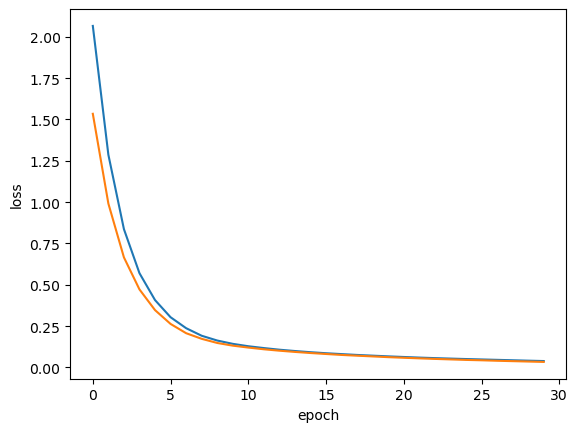

In [6]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [7]:
X_test = np.random.random_sample((200,3))*15-5
y_test = np.array([[1,1,1] for _ in range(200)])

In [8]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0404


0.040427908301353455

In [10]:
model.save('../PROJ/models/rosenbrock_model.hdf5')